In [47]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display, clear_output
import statistics
from scipy import stats
import numpy as np
import sqlite3

In [48]:
PLAYLIST_METADATA = 'data/playlist-details.csv'
# Database
DATABASE = 'data/ytdata.db'
connection = sqlite3.connect(DATABASE)

In [49]:
data = pd.read_sql_query('SELECT * FROM "2020-05-14"', connection)

In [50]:
playlist_details = pd.read_sql_query('SELECT * FROM Playlist', connection)

In [79]:
playlist_titles = pd.read_sql_query('SELECT id, title from Playlist', connection).to_dict(orient='records')

In [52]:
def filtered_data(playlist_id):
    return data[data['playlistId'] == playlist_id]

In [141]:
def get_playlist_title(playlist_id):
    return next(filter(lambda i: i['id'] == playlist_id, playlist_titles))['title']

In [53]:
def get_outlier(playlist_id, tolerance=2):
    playlist_data = filtered_data(playlist_id)
    view_count = playlist_data['views']
    # Append z-score column
    playlist_data = playlist_data.assign(zscore=stats.zscore(view_count), pct_change=view_count.pct_change(periods=1))
    mean = statistics.mean(view_count)
    std = statistics.stdev(view_count)
    lowerbound = mean - std * tolerance
    upperbound = mean + std * tolerance
    return playlist_data[view_count.isin([x for x in view_count if x < lowerbound or x > upperbound])].drop(columns=["id", "categoryId"])

In [54]:
def get_iqr(playlist_id):
    dataset = filtered_data(playlist_id)
    return np.percentile(dataset['views'], [75, 25])

In [55]:
def get_outliers_list():
    frames = []
    for i in range(len(playlist_details['id'])):
        frames.append(get_outlier(playlist_details['id'][i]))
    return pd.concat(frames)

In [56]:
# There is an anomaly in the data for SICP playlists. They should be 2 separate playlists
get_outliers_list().sort_values(by=['zscore'], ascending=False)

,title,playlistId,duration,views,uploadedDate,zscore,pct_change
575,ReactJS Tutorial - 1 - Introduction,PLC3y8-rFHvwgg3vaYJgHGnModB54rxOk3,PT9M34S,617275,2018-10-22T10:30:00Z,6.754551,NaN
109,"1. Algorithmic Thinking, Peak Finding",PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb,PT53M22S,2731642,2013-01-14T20:26:48Z,5.676774,NaN
407,"Advanced Algorithms (COMPSCI 224), Lecture 1",PL2SOU6wwxB0uP4rJgf5ayhHWgw7akUWSf,PT1H28M19S,4938181,2016-07-11T16:31:33Z,4.898683,NaN
382,"Algorithms for Big Data (COMPSCI 229r), Lecture 1",PL2SOU6wwxB0v1kQTpqpuu5kEJo2i-iUyf,PT1H26M5S,112745,2016-07-12T15:03:25Z,4.882643,NaN
0,Lecture 1 - Introduction to Algorithms,PLOtl7M3yp-DX32N0fVIyvn7ipWKNGmwpp,PT1H20M1S,51250,2017-03-20T23:02:15Z,4.840847,NaN
519,"Web Development Tutorial | HTML, CSS, JS Crash...",PL6cactdCCnTLkQah9GKzsJmiLbegy4dEk,PT11M21S,178798,2018-03-06T20:00:36Z,4.711628,NaN
298,Lec 1 | MIT 6.00 Introduction to Computer Scie...,PL4C4720A6F225E074,PT53M30S,4843196,2009-08-20T04:26:04Z,4.698329,NaN
194,Getting Started: Q&A,PLUl4u3cNGP60ZaGv5SgpIk67YnH1WqCLI,PT5M23S,24588,2017-10-13T19:08:15Z,4.685935,NaN
273,1. Introduction to Superposition,PLUl4u3cNGP61-9PEhRognw5vryrSEVLPr,PT1H16M7S,1768009,2014-06-18T18:53:01Z,4.549011,NaN
53,Lecture 1A | MIT 6.001 Structure and Interpret...,PLE18841CABEA24090,PT1H12M56S,919864,2009-04-08T15:51:22Z,4.329127,NaN


In [142]:
def display_chart(playlist_id):
    ax = sns.barplot(x='title', y='views', data=filtered_data(playlist_id))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set(xlabel='Video title', ylabel='View count')
    ax.set_title(get_playlist_title(playlist_id))
    display(ax)

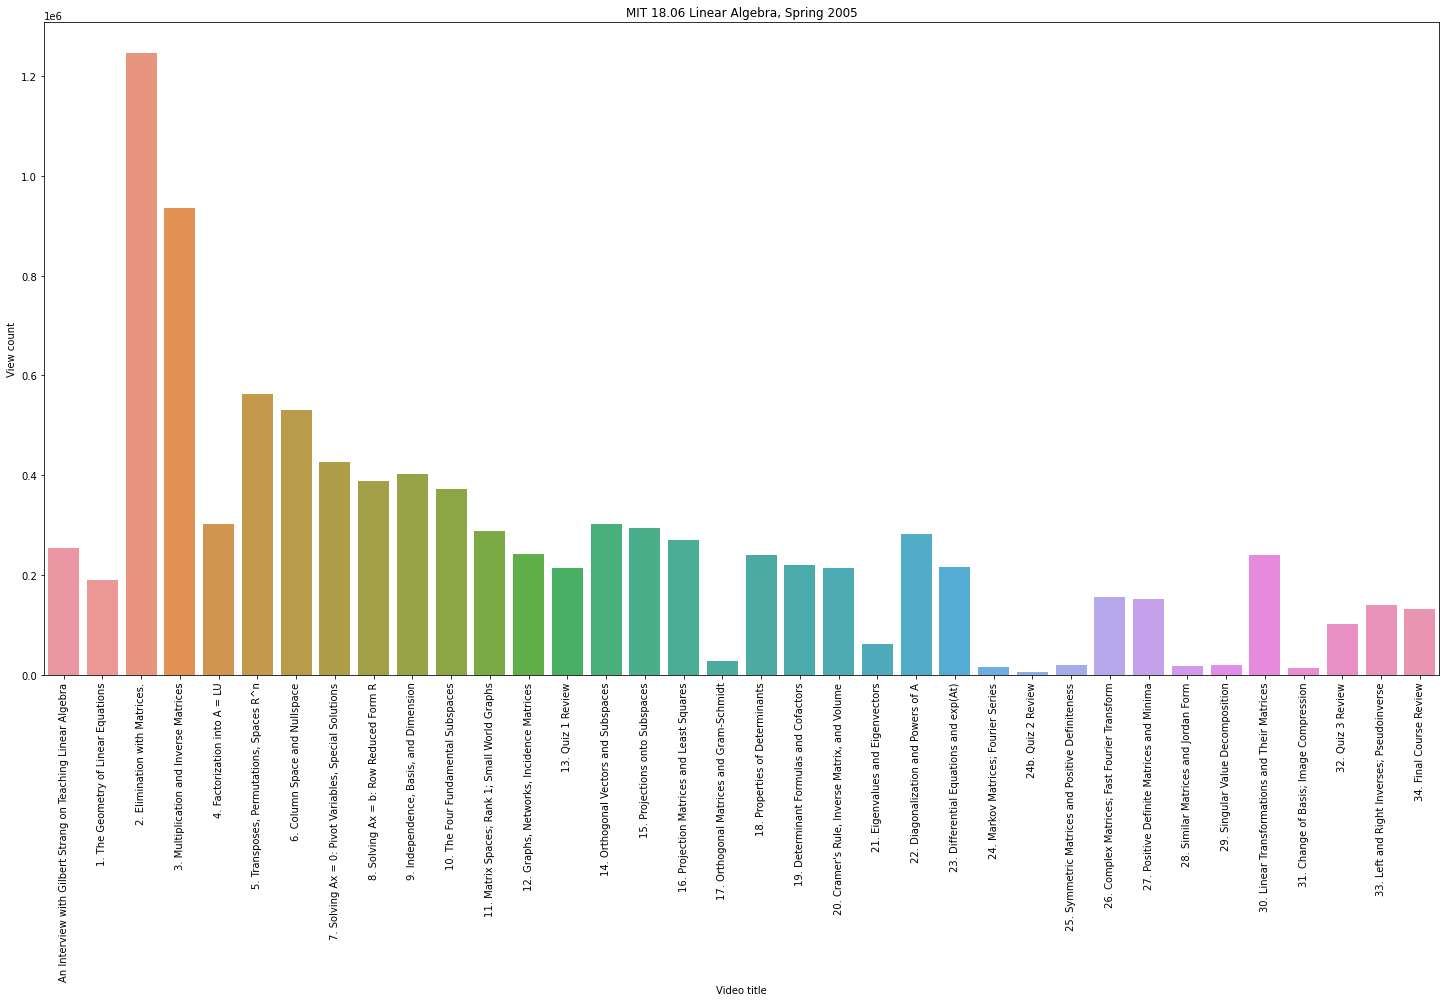

In [143]:
plt.figure(figsize=(25, 12))
display_chart('PLE7DDD91010BC51F8')